In [7]:
from IPython.display import clear_output
import time

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# 1. Анализ данных

In [8]:
%run table_making.ipynb
clear_output()

In [9]:
print(f"Корреляция между логарифмом BTC и ETH: {round(log_btc_eth_df.corr().iloc[0, 1], 3)}")

Корреляция между логарифмом BTC и ETH: 0.934


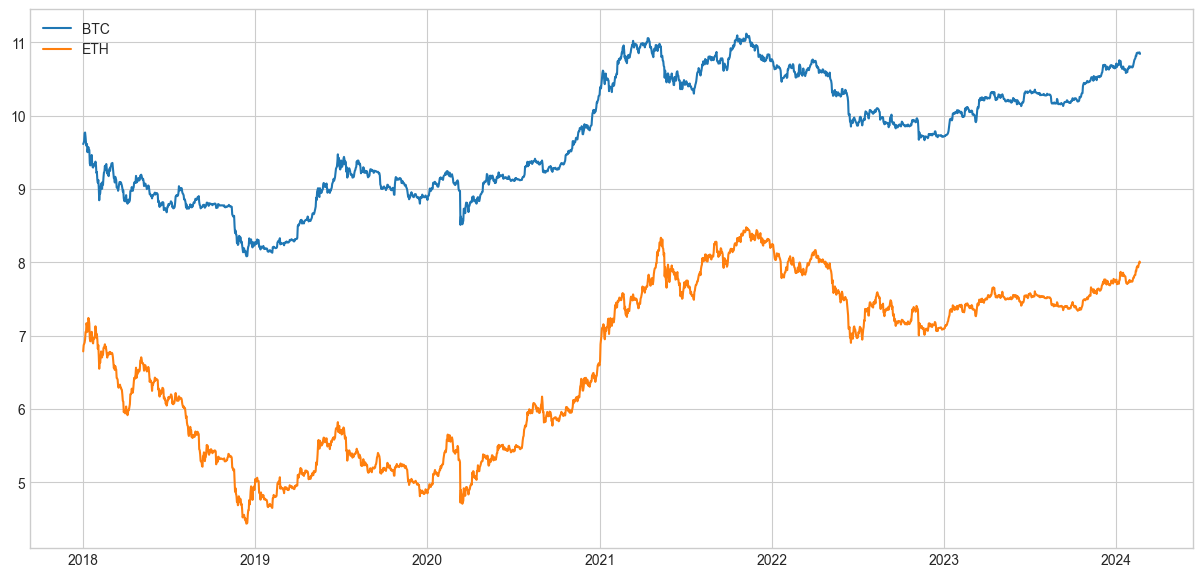

In [10]:
plt.figure(figsize=(15, 7))

plt.plot(log_btc_eth_df.log_btc, label='BTC')
plt.plot(log_btc_eth_df.log_eth, label='ETH')

plt.legend()

plt.savefig('./Images/log_btc_eth.png')
plt.show()

# 2. Одношаговое прогнозирование

## 2.1 Обучение

In [131]:
# Определим гиперпараметры
delta = 1
lags = [5]  # [5, 10, 20, 50, 100, 200]
sigmas = [0]  # [0, 0.001, 0.01, 0.03, 0.05, 1]
batch_size = 128
num_epoch = 1

one_step_test_history = dict()

In [132]:
try:
    for h in lags:
        for sigma in sigmas:
            %store sigma
            %store h
            %run data_processing.ipynb
            %run one_step_evaluation.ipynb
except KeyboardInterrupt as e:
    clear_output()
    print("Fitting was interrupted")

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.84it/s]


## 2.2. Визуализация

Сначала зафиксируем $h = 20$ и сравним результаты прогнозирования в зависимости от значений $\sigma$.

In [126]:
one_step_h_20_history = dict()
for params in one_step_test_history:
    h, sigma = params
    if h == 20:
        one_step_h_20_history[sigma] = one_step_test_history[params]

KeyError: 0

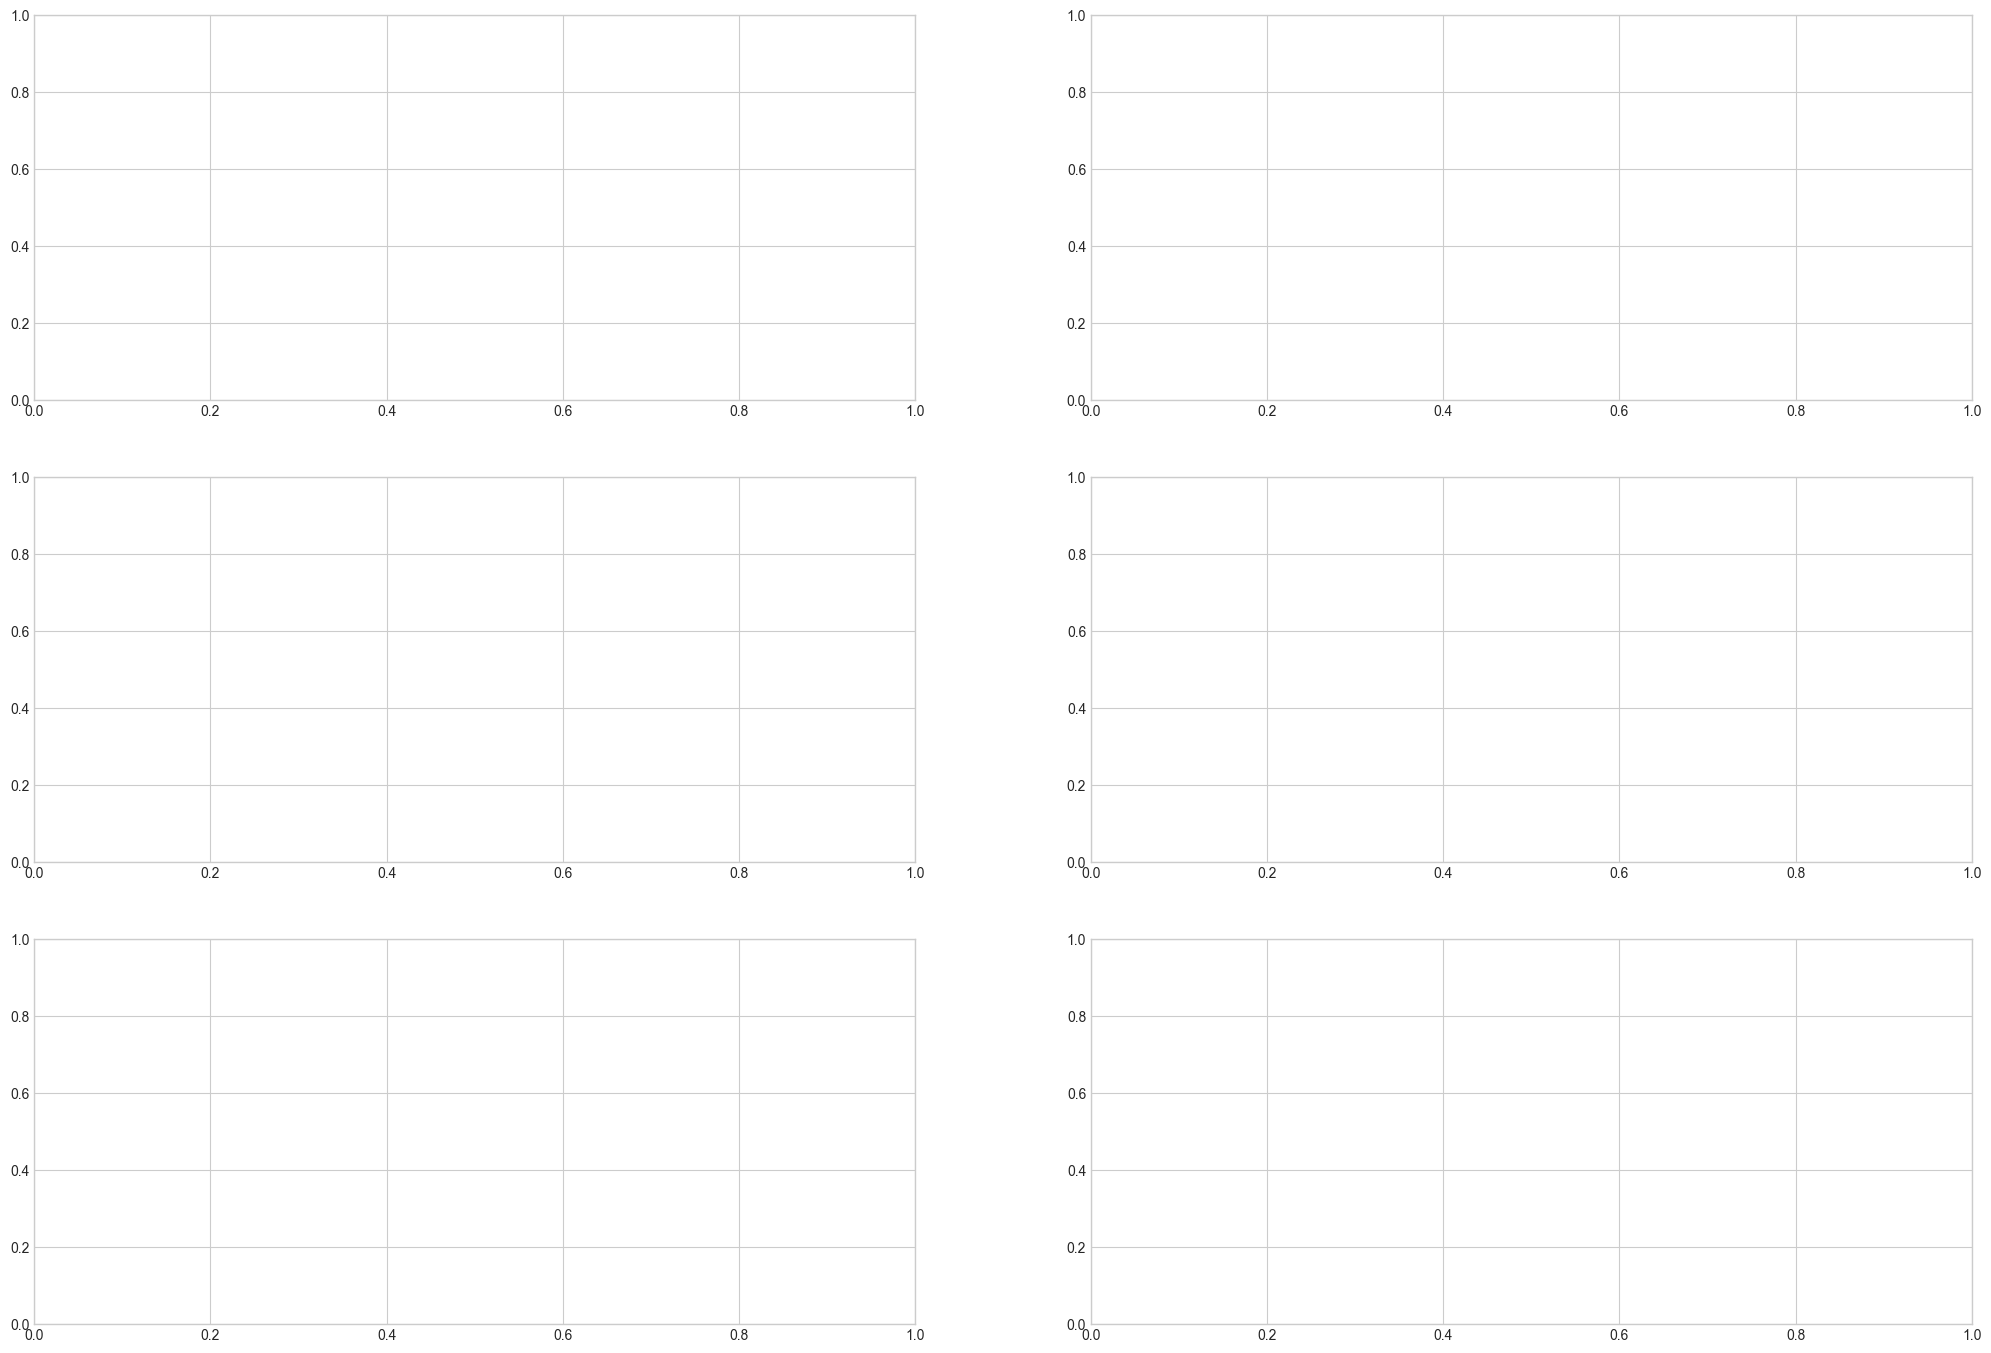

In [127]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = 20, sigmas[i]
    
    one_step_y_pred_test = one_step_h_20_history[sigma]
    
    plot_series(
        y_test_final[1:], pd.Series(one_step_y_pred_test, index=y_test_final[1:].index), labels=['test', 'pred'], ax=axes[i]
    )
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)

plt.savefig(f'./Images/one_step_h={20}.png')
plt.show()

Теперь аналогично зафиксируем $\sigma = 0.01$ и посмотрим на то, как предсказания зависят от количества используемых лагов $h$.

In [9]:
one_step_sigma_001_history = dict()
for params in one_step_test_history:
    h, sigma = params
    if sigma == 0.01:
        one_step_sigma_001_history[h] = one_step_test_history[params]

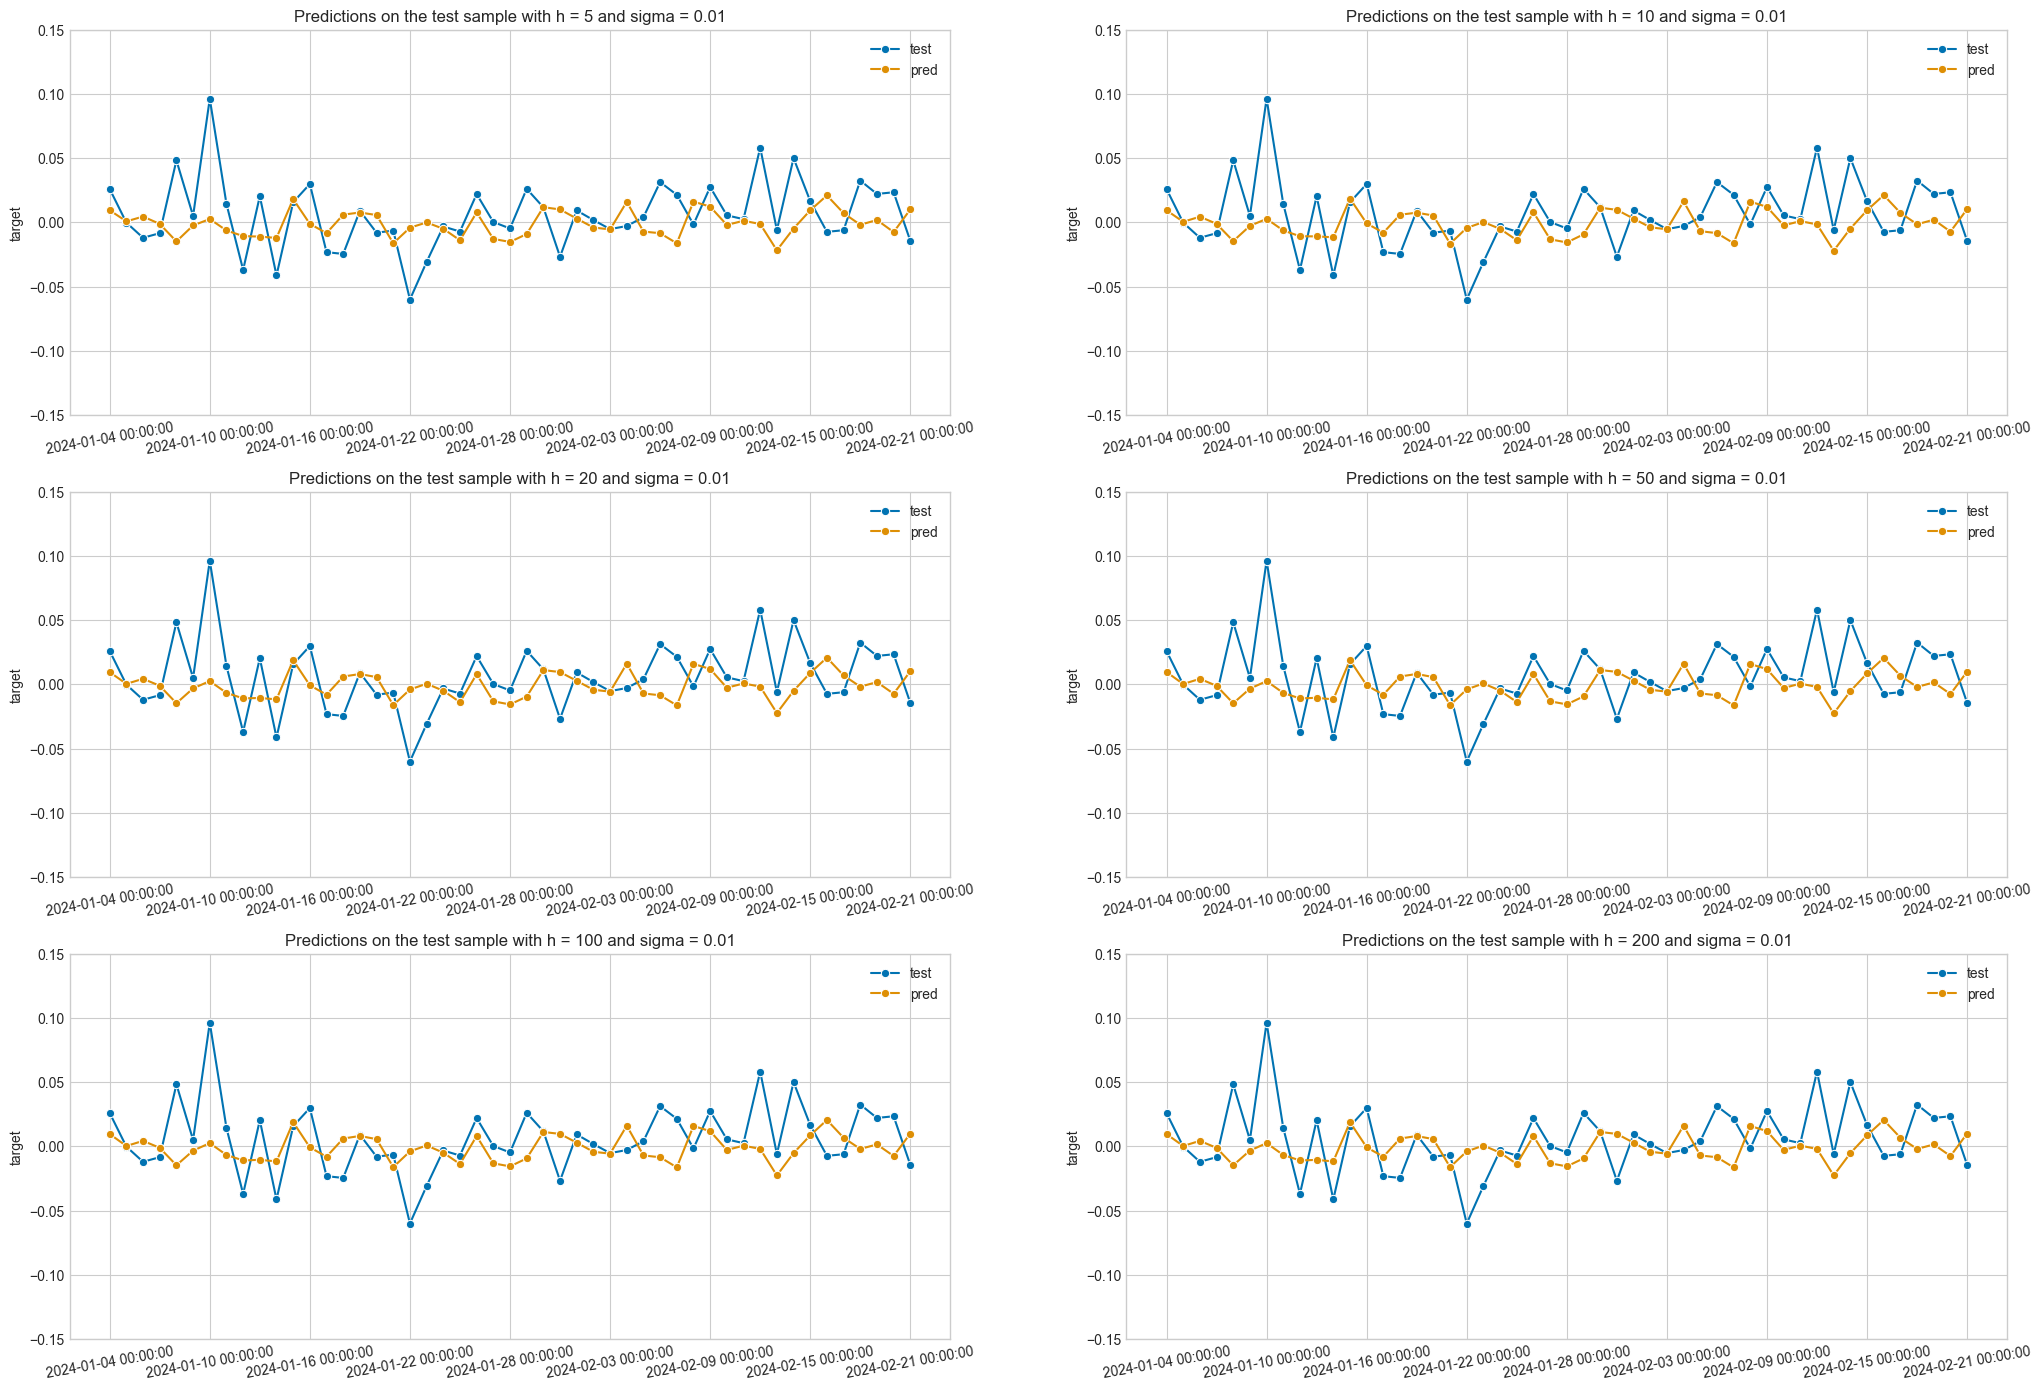

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = lags[i], 0.01
    
    one_step_y_pred_test = one_step_sigma_001_history[h]
    
    plot_series(
        y_test_final[1:], pd.Series(one_step_y_pred_test, index=y_test_final[1:].index), labels=['test', 'pred'], ax=axes[i]
    )
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)


plt.savefig(f'./Images/one_step_sigma={0.01}.png')
plt.show()

# 3. Многошаговое прогнозирование

## 3.1 Обучение

In [11]:
# Определим гиперпараметры
delta = 1
lags = [5, 10, 20, 50, 100, 200]
sigmas = [0, 0.001, 0.01, 0.03, 0.05, 1]
batch_size = 128

multi_step_test_history = dict()

In [12]:
try:
    for h in lags:
        for sigma in sigmas:
            %store sigma
            %store h
            %run data_processing.ipynb
            %run multi_step_evaluation.ipynb
except KeyboardInterrupt as e:
    clear_output()
    print("Fitting was interrupted")

## 3.2. Визуализация

Сначала зафиксируем $h = 20$ и сравним результаты прогнозирования в зависимости от значений $\sigma$.

In [13]:
multi_step_h_20_history = dict()
for params in multi_step_test_history:
    h, sigma = params
    if h == 20:
        multi_step_h_20_history[sigma] = multi_step_test_history[params]

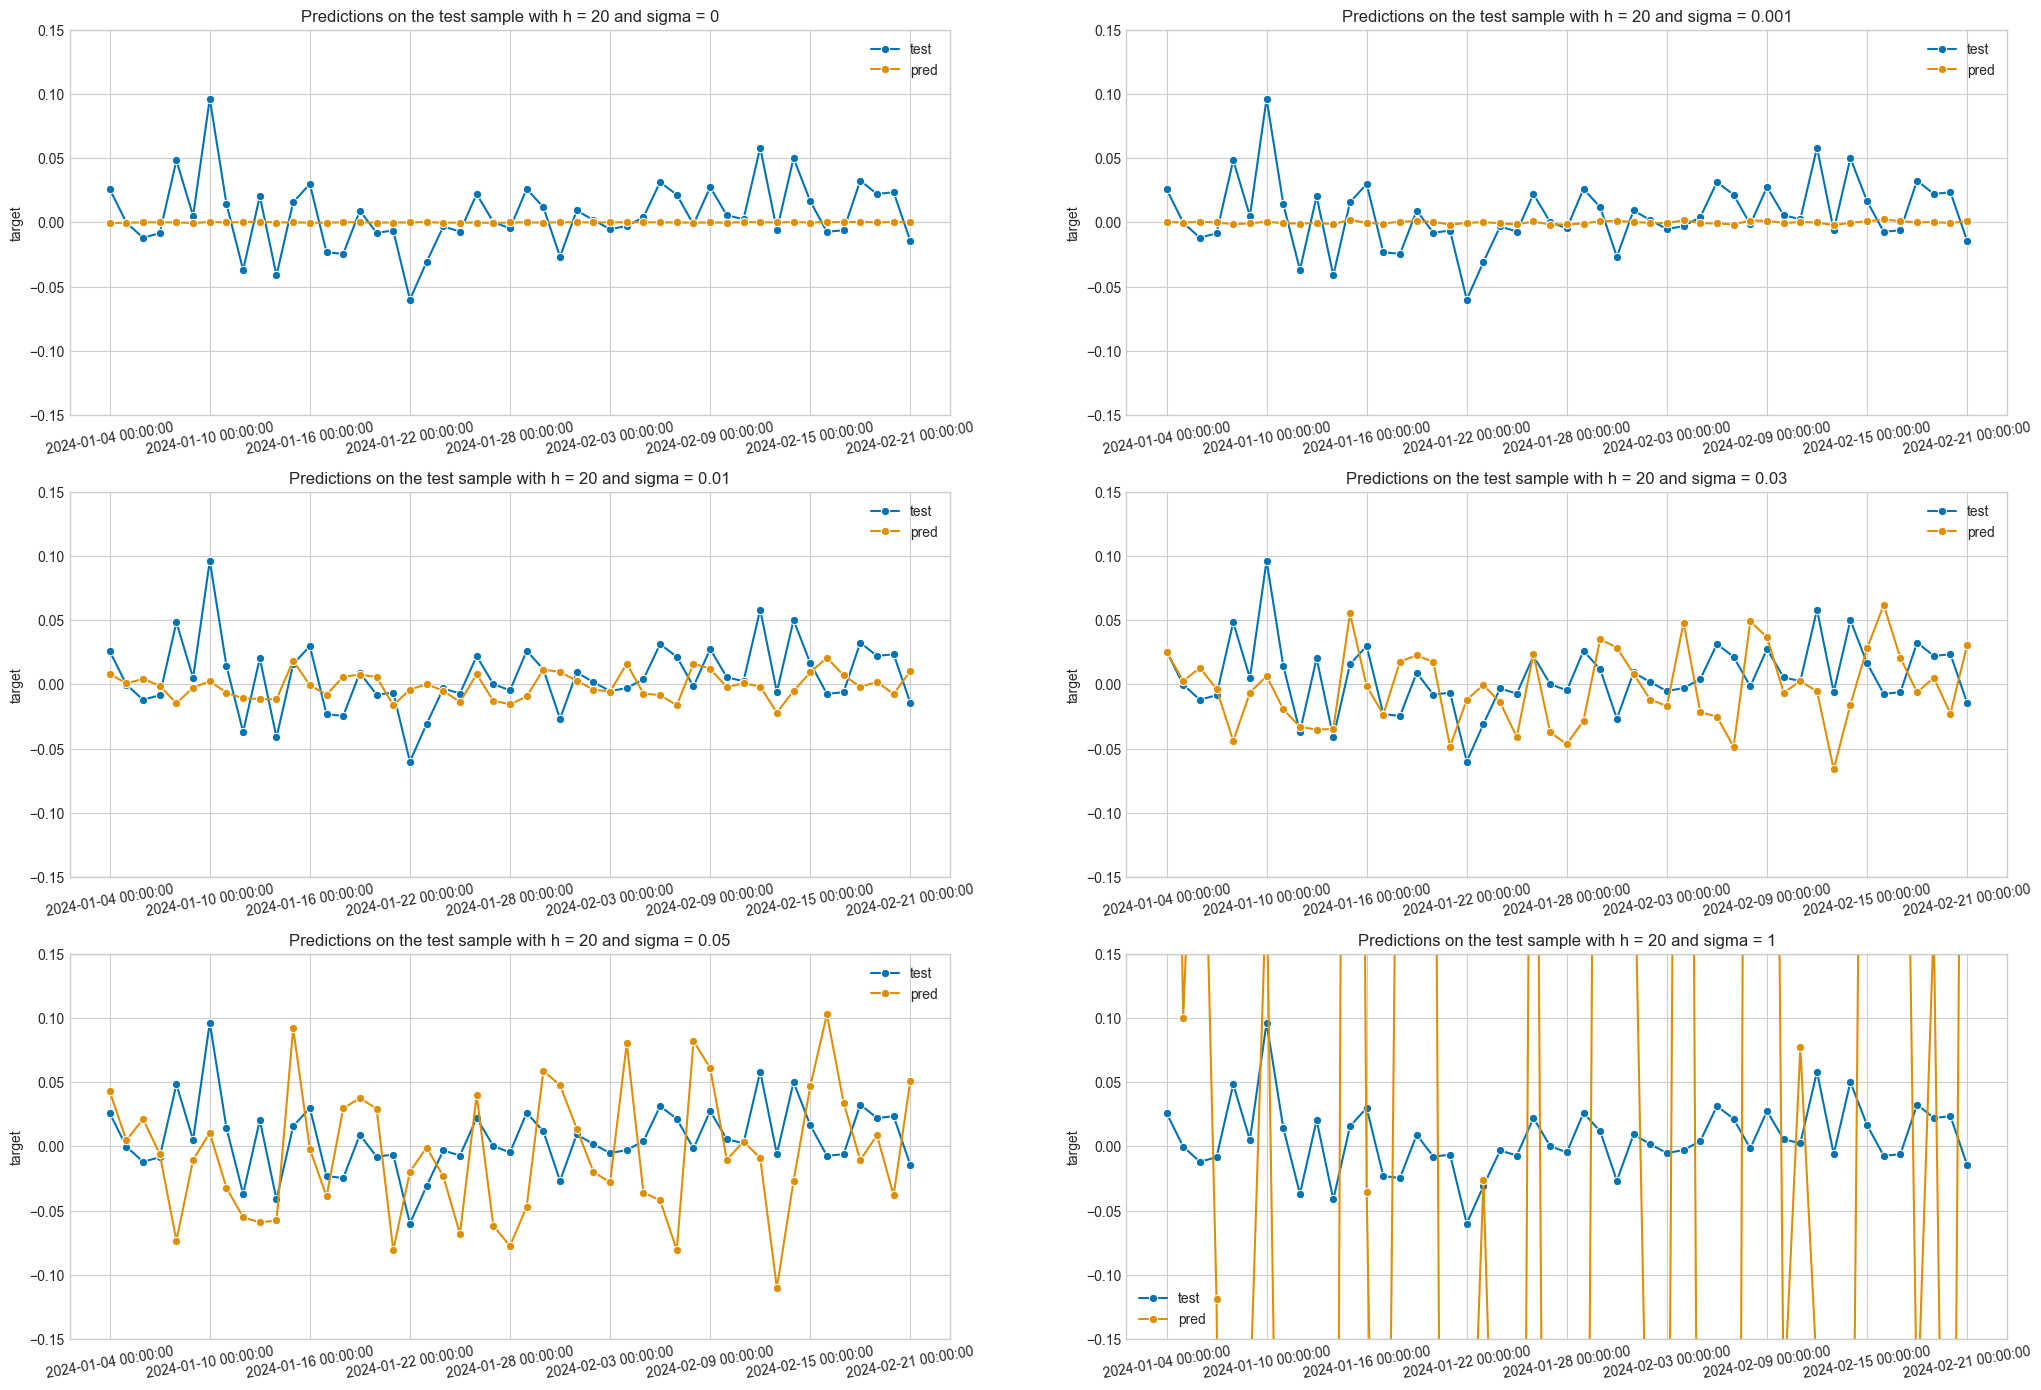

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = 20, sigmas[i]
    
    multi_step_y_pred_test = multi_step_h_20_history[sigma]
    
    plot_series(
        y_test_final[1:], pd.Series(multi_step_y_pred_test, index=y_test_final[1:].index), labels=['test', 'pred'], ax=axes[i]
    )
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)

plt.savefig(f'./Images/multi_step_h={20}.png')
plt.show()

Теперь аналогично зафиксируем $\sigma = 0.01$ и посмотрим на то, как предсказания зависят от количества используемых лагов $h$.

In [15]:
multi_step_sigma_001_history = dict()
for params in one_step_test_history:
    h, sigma = params
    if sigma == 0.01:
        multi_step_sigma_001_history[h] = multi_step_test_history[params]

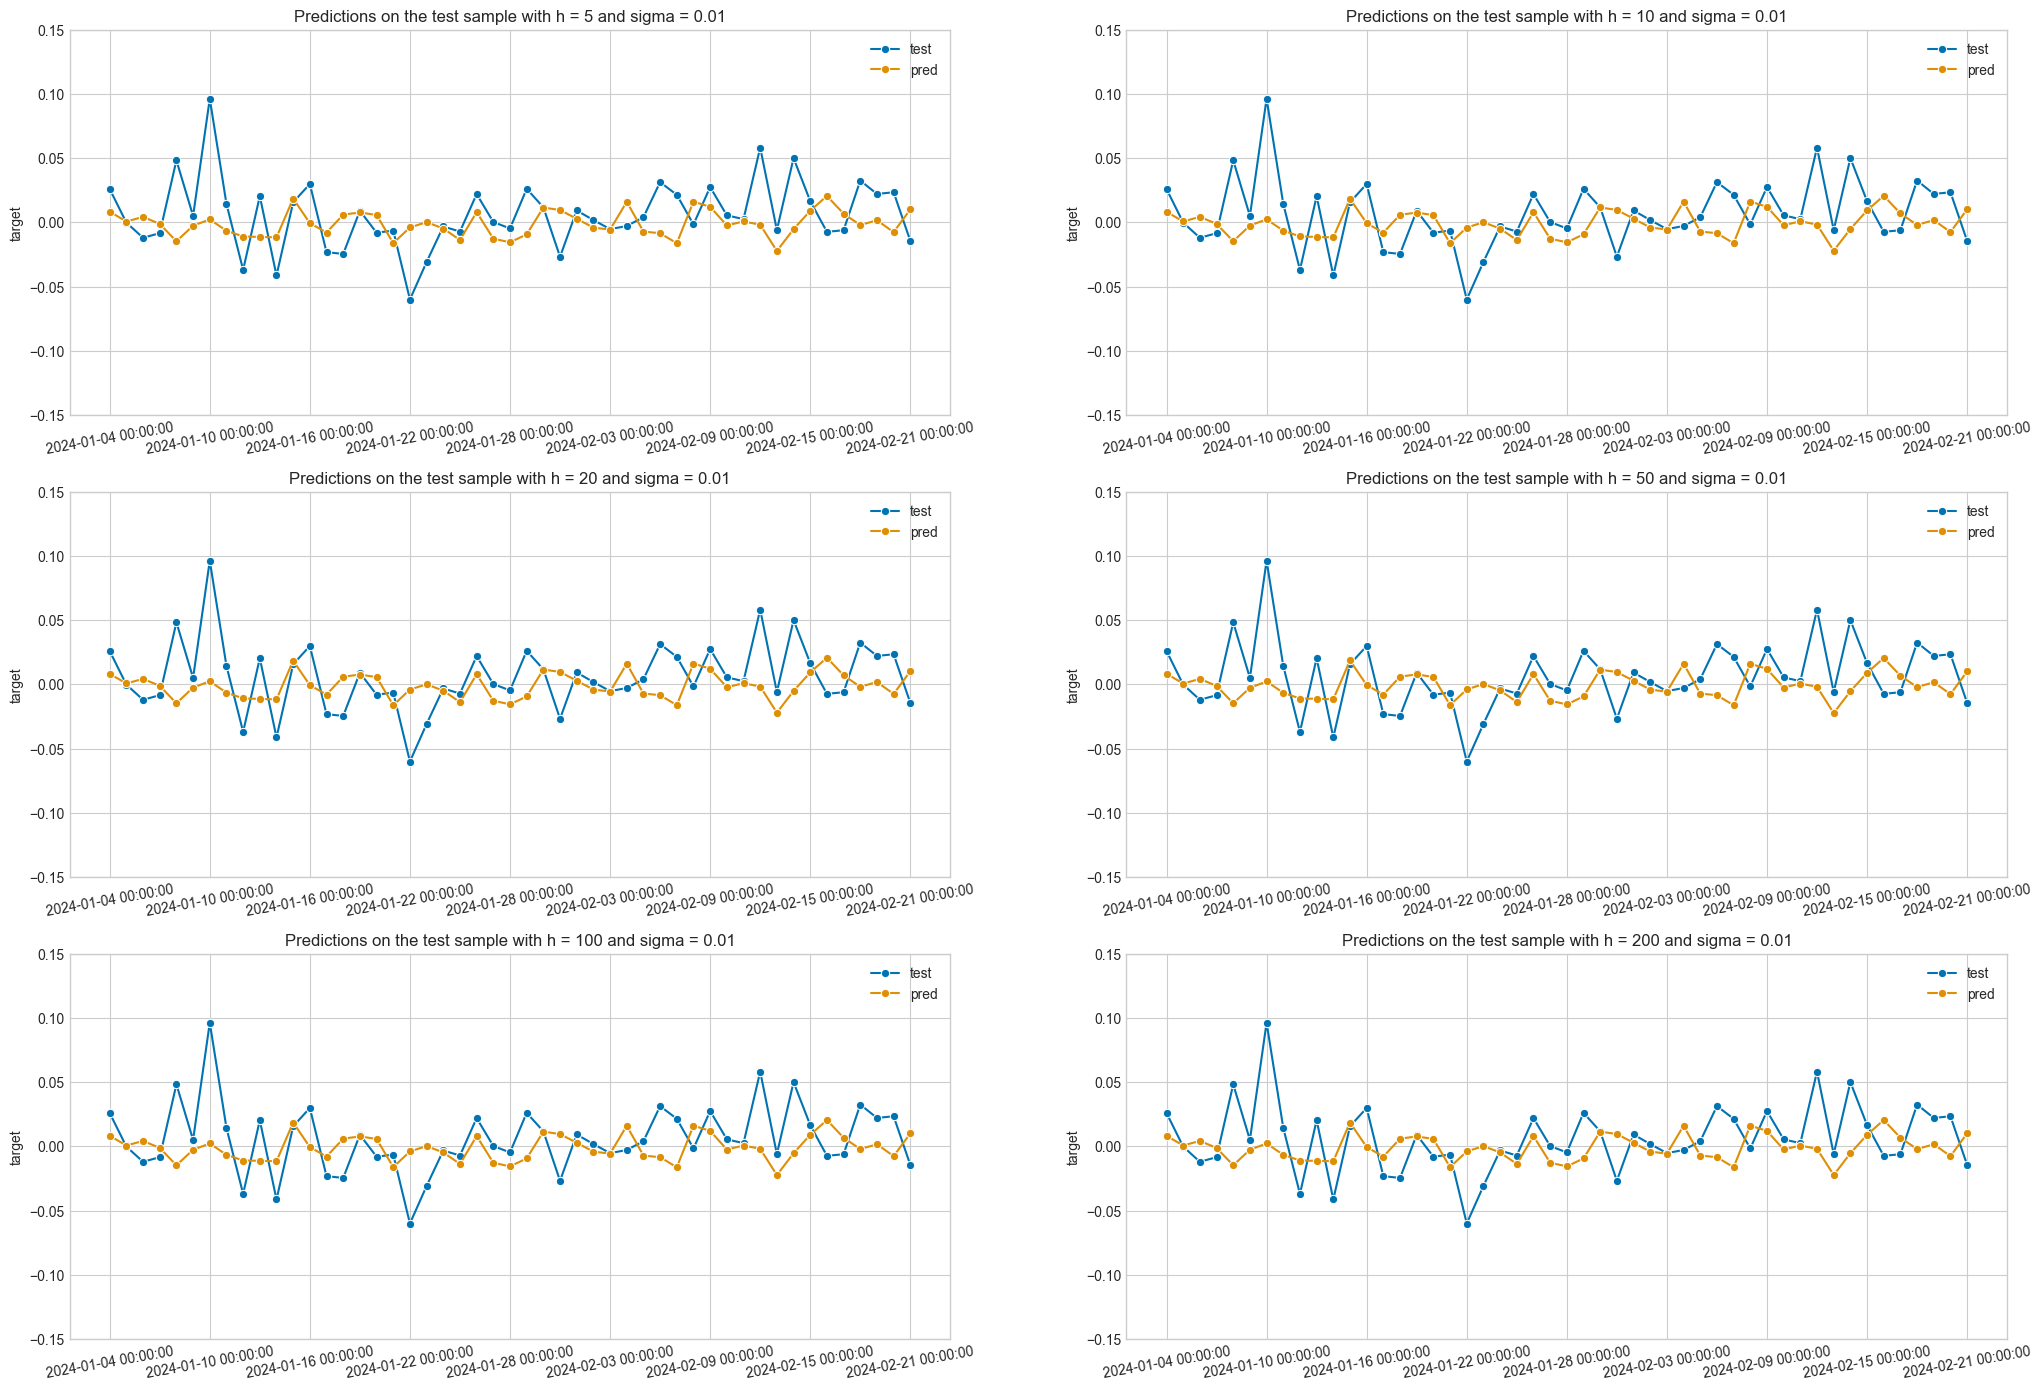

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = lags[i], 0.01
    
    multi_step_y_pred_test = multi_step_sigma_001_history[h]
    
    plot_series(
        y_test_final[1:], pd.Series(multi_step_y_pred_test, index=y_test_final[1:].index), labels=['test', 'pred'], ax=axes[i]
    )
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)

plt.savefig(f'./Images/multi_step_sigma={0.01}.png')
plt.show()

---

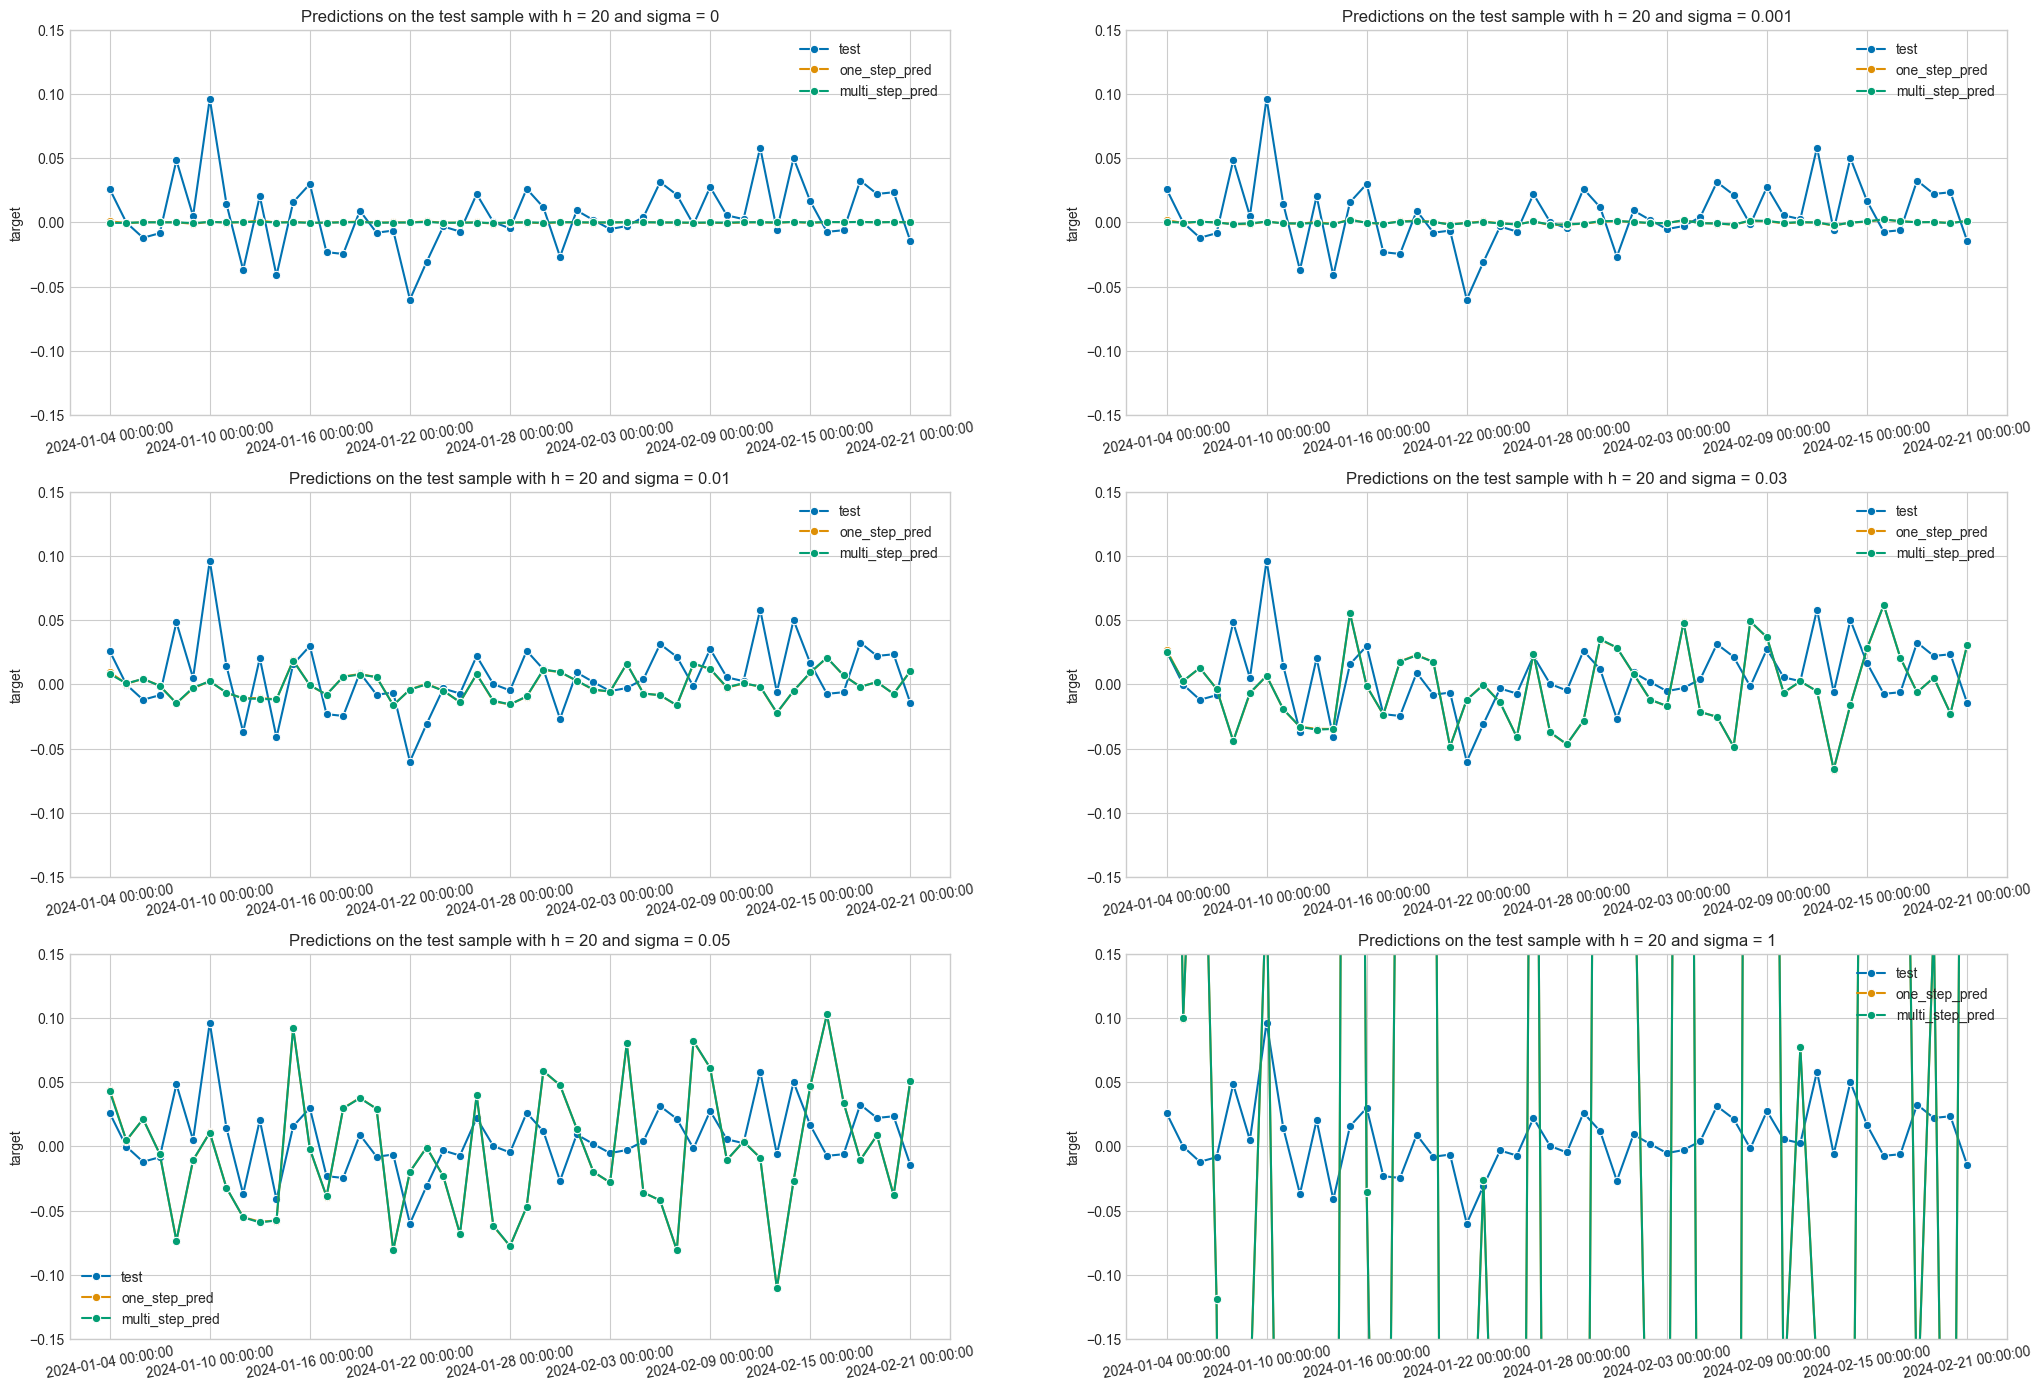

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = 20, sigmas[i]
    
    one_step_y_pred_test = one_step_h_20_history[sigma]
    multi_step_y_pred_test = multi_step_h_20_history[sigma]
    
    plot_series(
        y_test_final[1:],
        pd.Series(one_step_y_pred_test, index=y_test_final[1:].index),
        pd.Series(multi_step_y_pred_test, index=y_test_final[1:].index),
        labels=['test', 'one_step_pred', 'multi_step_pred'],
        ax=axes[i]
    )
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)

plt.savefig(f'./Images/os_ms_comparison_h={20}.png')
plt.show()

In [22]:
mad = 0
for key in one_step_h_20_history.keys():
    mad += np.abs((one_step_h_20_history[key] - multi_step_h_20_history[key])).sum()
    
mad /= 6
mad

0.008973936239878336

# 4. Оценка $\sigma$

In [134]:
model = torch.load('./Models/one_step_model.pth')

In [135]:
data = pd.read_excel('./Data/data.xlsx')
data.index = data.Date
del data['Date']

In [136]:
X_train = torch.tensor(data.iloc[:-50, :5].values.reshape((-1, h, 1)).astype('float32'))
with torch.no_grad():
    f = model(X_train.to(device))

In [137]:
sample = []
for i in range(1, n - lags[0] - 50):
    target_i = data.target[i]
    
    f_curr = f[i].item()
    f_prev = f[i - 1].item()
    
    X_i = target_i - (f_curr - f_prev) * np.sqrt(delta)
    sample.append(X_i)

sample = np.array(sample)

In [138]:
sigma_hat = np.sqrt(np.mean(np.power(sample, 2)))

In [139]:
sigma_hat

0.04728431635931093

# 5. Итоговый прогноз

In [140]:
X = torch.tensor(data.iloc[:, :5].values.reshape((-1, h, 1)).astype('float32'))

In [141]:
data

,M_t_5,M_t_4,M_t_3,M_t_2,M_t_1,Z_t,target
Date,,,,,,,
2018-01-07,9.614612,9.629116,9.654975,9.765920,9.771498,-1.164913,0.101680
2018-01-08,9.629116,9.654975,9.765920,9.771498,9.709757,-0.839202,-0.004032
2018-01-09,9.654975,9.765920,9.771498,9.709757,9.627082,-1.144448,0.123681
2018-01-10,9.765920,9.771498,9.709757,9.627082,9.588462,0.206789,-0.034376
2018-01-11,9.771498,9.709757,9.627082,9.588462,9.614024,-0.629471,-0.083749
...,...,...,...,...,...,...,...
2024-02-17,10.818942,10.814613,10.855660,10.857817,10.862075,0.681654,-0.006089
2024-02-18,10.814613,10.855660,10.857817,10.862075,10.852497,-0.217109,0.032594
2024-02-19,10.855660,10.857817,10.862075,10.852497,10.861353,0.174204,0.022182


In [142]:
Z = data['Z_t'].values.reshape(-1, 1)

In [143]:
with torch.no_grad():
    f = model(X.to(device)).to('cpu').numpy()

In [144]:
f_curr = f[1:]
f_prev = f[:-1]

In [146]:
y_pred = (f_curr - f_prev) * np.sqrt(delta) + sigma_hat * Z[1:, :]

In [147]:
y_pred_test = y_pred[-49:].flatten()

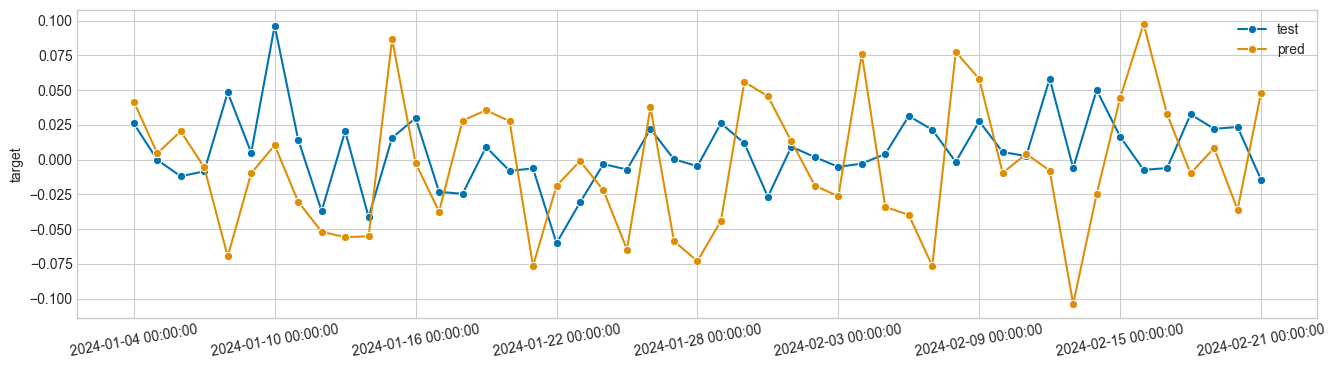

In [148]:
plot_series(
        y_test_final[1:],
        pd.Series(y_pred_test, index=y_test_final[1:].index),
        labels=['test', 'pred'],
    )

plt.xticks(rotation=10)
plt.show()

**Заметка:**

1. Видно, что предположение о постоянной $\sigma$ невалидно (см. 2024-01-28)

2. Наблюдаются предсказание схожей с реальной тенденции, но при этом фактическое и предсказываемое значение могут иметь разные знаки, а это значит, что модель прогнозирует противоположную динамику.